In [1]:
from IPython.display import Image

### A co jeśli nie mamy skalibrowanych dwóch kamer?

W takiej sytuacji mozliwe jest wyznaczenie pozycji w 3D ale musimy wykryć punkty sobie odpowiadające na dwóch obrazach 2D. Można do tego uzyć jakiegoś popularnego wzorca, najlepiej, żeby punkty nie były współpłaszczyznowe. Można wtedy zastosować jakieś ekstraktory jakis SIRF czy SURF. Następnie korzystając z punktów odpowiadających można wyznaczyć macierz fundamentalną za pomocą metody RANSAC lub metodą 8-punktową.

Najlepiej jeśli możliwe byłoby przeprowadzenie kalibracji każdej z kamer z osobna. Wtedy bez problemu można wyznaczyć macierz E z macierzy F oraz dodatkowo usunąć zniekształcenia z wyznaczonych punktów 2D. Bez znajomości macierzy K możemy założyć, że kamery mają takie same ogniskowe, a wynik będzie przedstawiony w układzie up to scale (względne proporcje będą poprawne ale nie ich rzeczywista skala). Bazując tylko na F możliwe jest późniejsze przeskalowanie np. używając dodatkowego czujnika LIDAR albo znana jest rzeczywista odległość między dwoma punktami. 

Poniżej przedstawione jest rozwiązanie jeśli mamy znane macierze parametrów wewnętrznych i współczynniki zniekształcenia dla obydwu kamer.

Dla zrozumienia  SVD polecam ten filmik: https://www.youtube.com/watch?v=vSczTbgc8Rc (powtórkowo z poprzednich)
- bazuje na zależności algebraicznej macierzy symetrycznej - jest kwadratowa i ma takie same elementy po dwóch stornach przekątnej
- jeśli mamy macierz A o wymirach n x m i chcemy uzyskać macierz syteryczną B to mamy zależność B = A * A^T
- jeśli rozkładamy macierz W przez SVD to obliczamy dwie macierze symetryczne Sl i Sr o wymiarach kolejno: n x n i m x m, które kolejno zawierają wektory własne lewe i prawe. 

- przy dekompozycji w tym wypadku uzywamy macierzy W,a by zapewnić własności macieryz rotacji: jest ortogonalna z wyznacznikiem + 1.


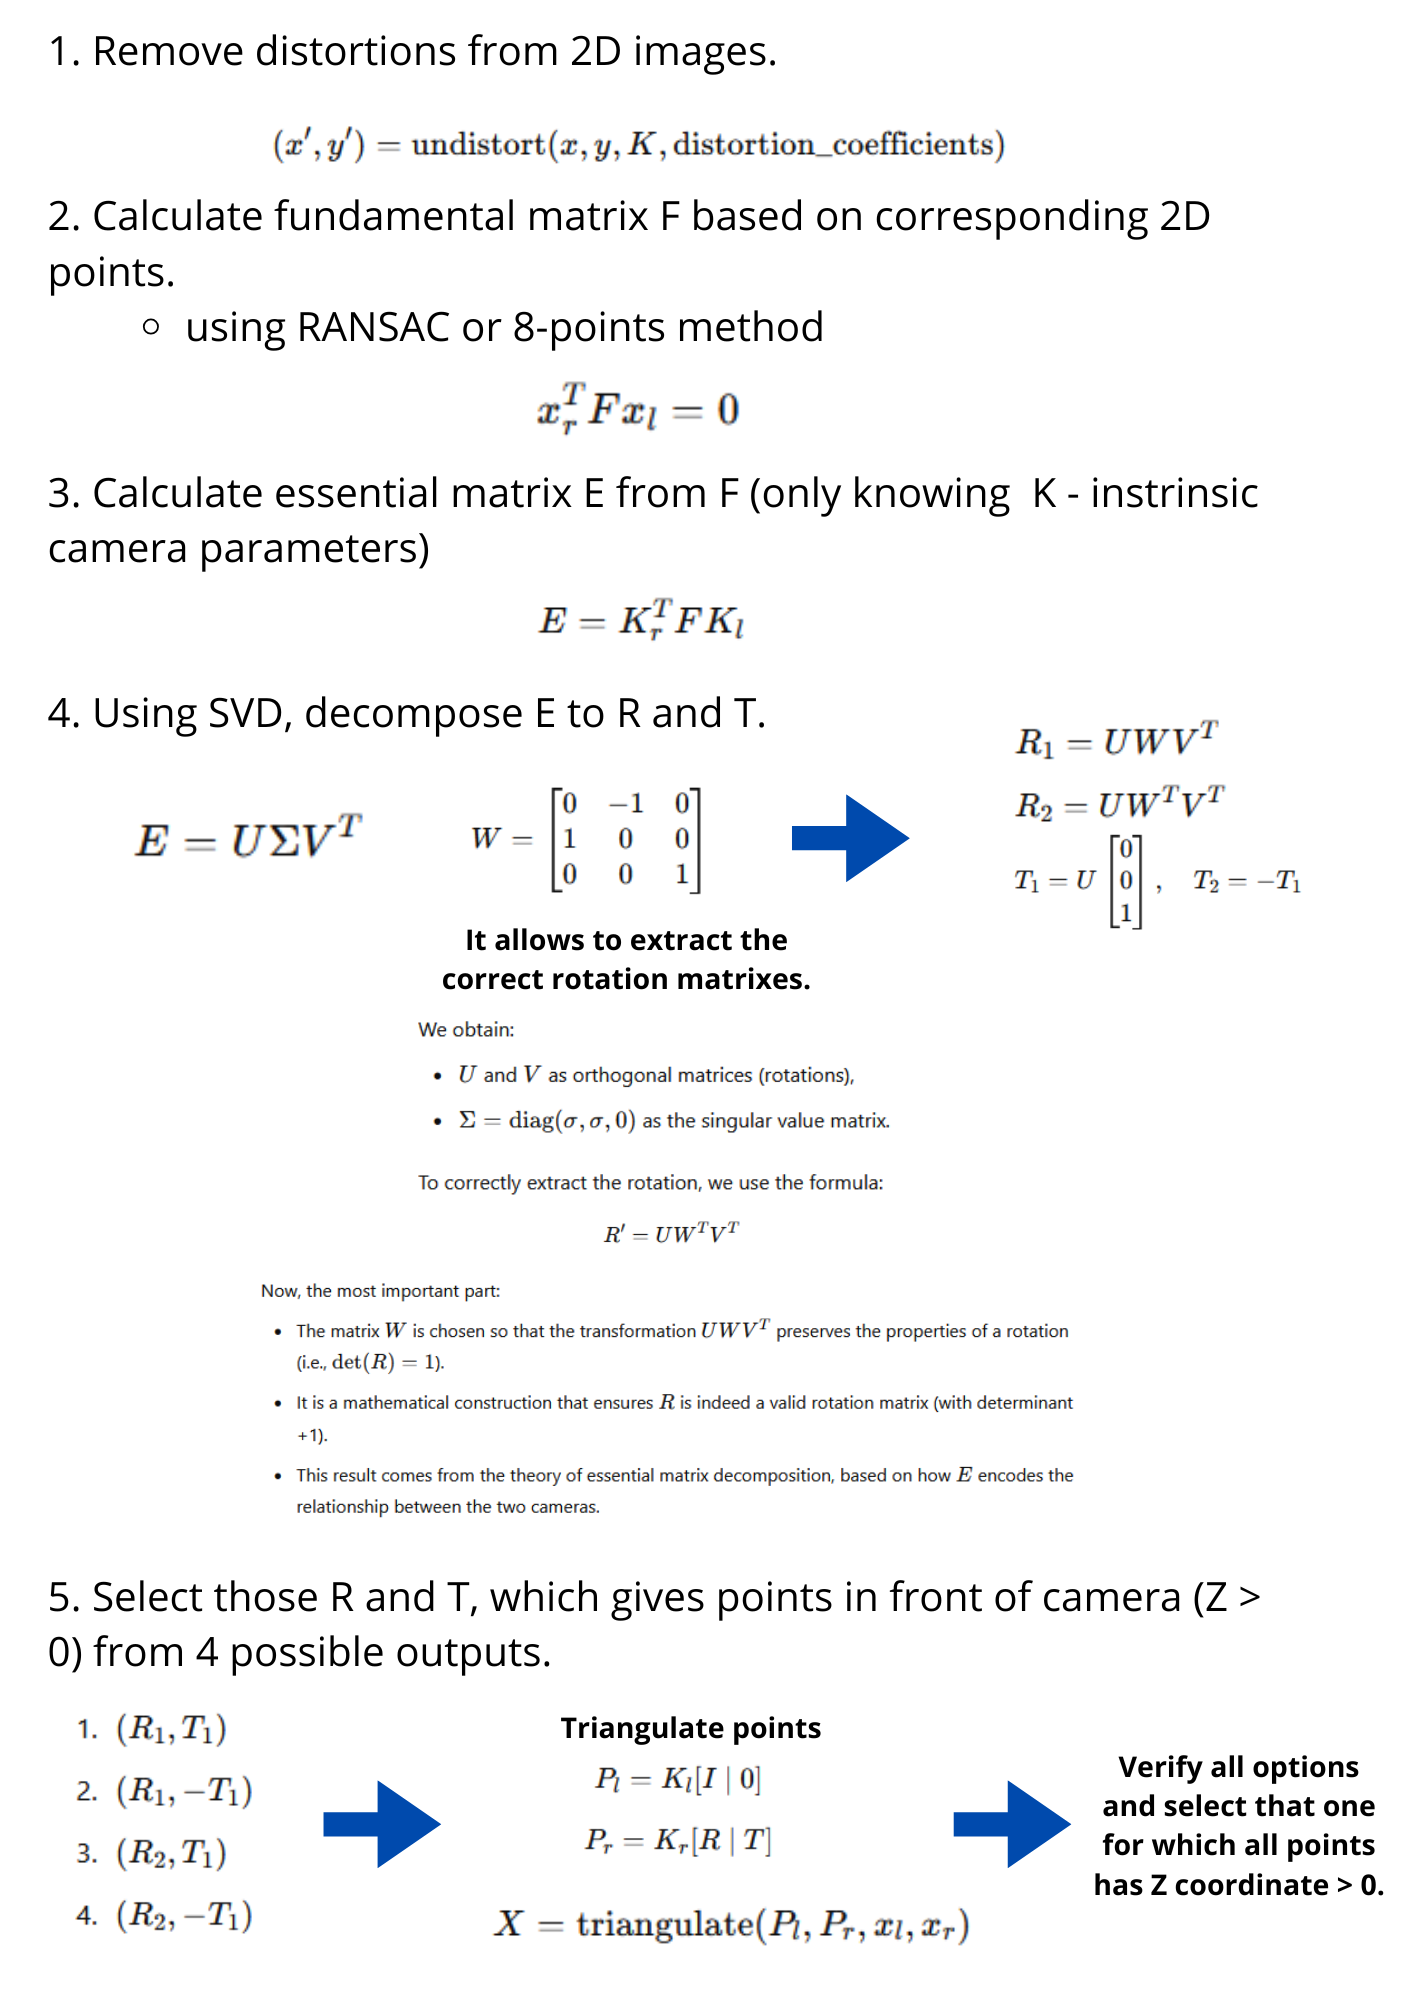

In [ ]:
# source: https://www.youtube.com/watch?v=zX5NeY-GTO0 
Image(filename=".././images/4_1.png", width=600)

### Spróbujmy prześledzić matematycznie jak można uzyskać te macierz fundamentalną

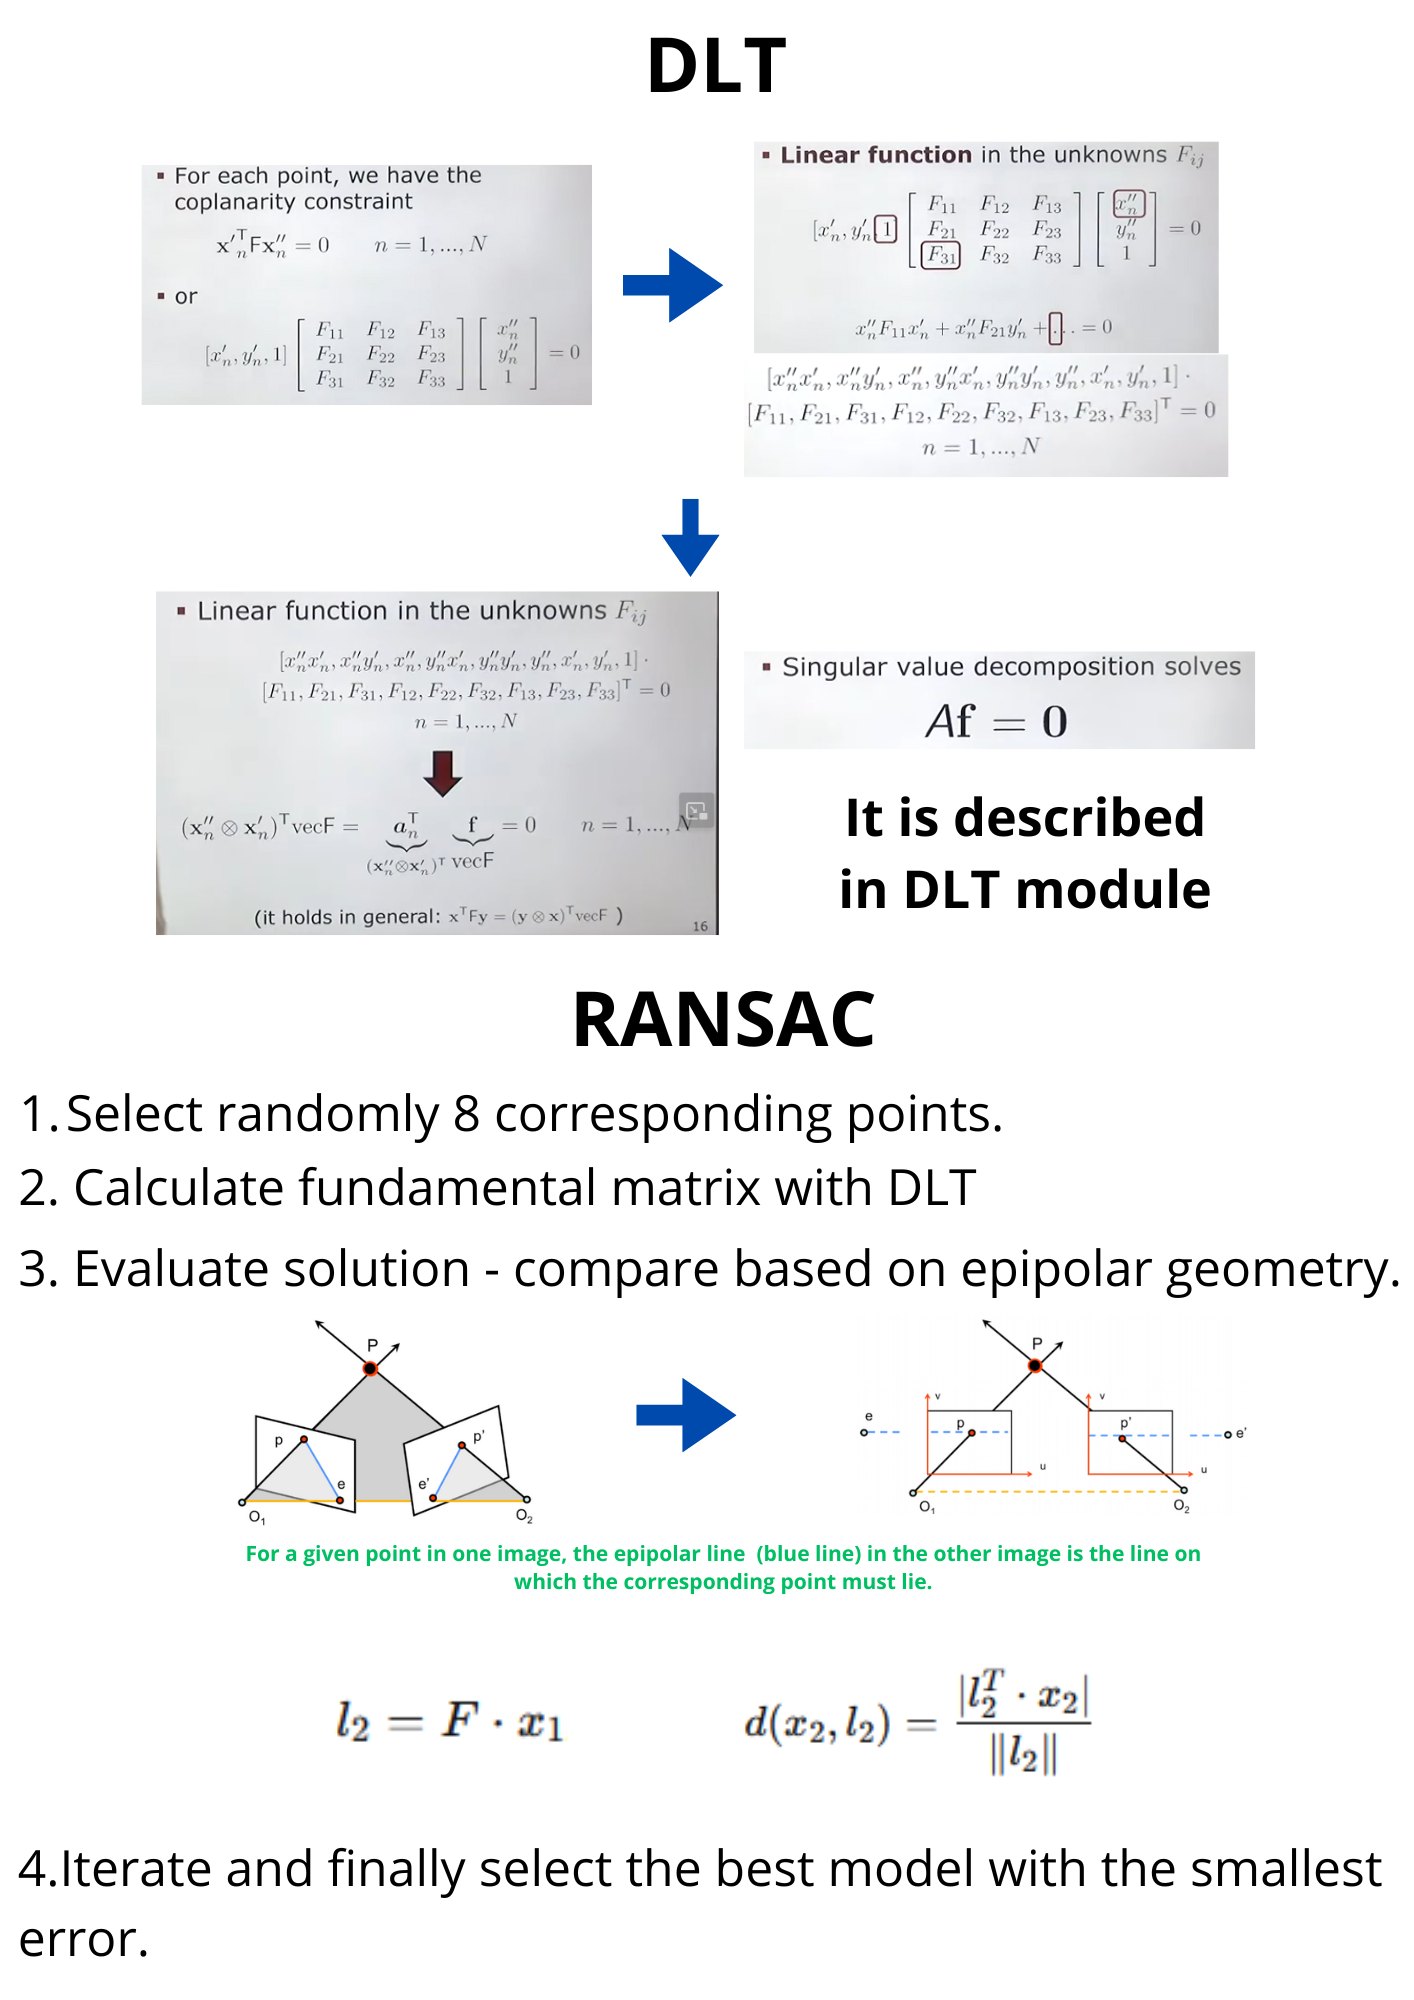

In [6]:

# source: https://web.stanford.edu/class/cs231a/course_notes/03-epipolar-geometry.pdf, https://www.youtube.com/watch?v=zX5NeY-GTO0 
Image(filename=".././images/4_2.png", width=600)